In [2]:
import tensorflow as tf

tf.__version__

# output should be higher than 1.10.0

'1.13.0-rc2'

In [11]:
mnist = tf.keras.datasets.mnist
# a database of 28x28 images of handwritten digits from 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

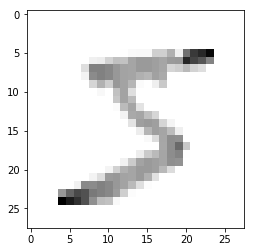

In [14]:
import matplotlib.pyplot as plt

# print(x_train[0])
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3091 - acc: 0.9147
Epoch 2/3
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1412 - acc: 0.9593
Epoch 3/3
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0961 - acc: 0.9713


In [21]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.1038 - acc: 0.9691
0.10384429175257683 0.9691


In [23]:
model.save('chris_mnist.model')
# to save a trained model

In [42]:
new_model = tf.keras.models.load_model('chris_mnist.model')

predictions = new_model.predict(x_test)

# print(predictions)

import numpy as np

print('Prediction is:', np.argmax(predictions[0]))

Prediction is: 7


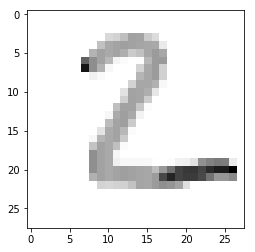

In [43]:
plt.imshow(x_test[1], cmap = plt.cm.binary)